<a href="https://colab.research.google.com/github/Seedplant/React-Test/blob/master/%EB%91%98%EC%A7%B8%EB%82%A0_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 데이터를 준비하고
x = [
    [0.0, 0.0],
    [0.0, 1.0],
    [1.0, 0.0],
    [1.0, 1.0]
]
y = [
    [0.0],
    [1.0],
    [1.0],
    [0.0]
]


In [0]:
import tensorflow as tf

# 모델을 만들고
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=(None, 2))
Y = tf.placeholder(tf.float32, shape=(None, 1))


# layer 1
W1 = tf. Variable(tf.random_normal([2, 2]))
B1 = tf. Variable(tf.random_normal([2]))

# H = X * W + B
H1 = tf.add(tf.matmul(X, W1), B1)
H1 = tf.nn.sigmoid(H1)  #Activation function

# layer 2
W2 = tf. Variable(tf.random_normal([2, 1]))
B2 = tf. Variable(tf.random_normal([1]))

H2 = tf.add(tf.matmul(H1, W2), B2)





# cost를 정의합니다.

cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = H2, labels=Y)
cost = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

pred = tf.nn.sigmoid(H2)



In [6]:
# 모델을 합습 / 평가합니다.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    sess.run(optimizer, feed_dict={X: x, Y: y})
    if i % 100 == 0:
        c = sess.run(cost, feed_dict={X :x, Y:y})
        print(c)

1.3022412
0.68452203
0.63484377
0.6016656
0.5754392
0.55515105
0.5395061
0.52751803
0.5183391
0.5112703


In [72]:
p = sess.run(pred, feed_dict={X: x})
print(p)

[[0.09915867]
 [0.8414414 ]
 [0.86929095]
 [0.08537678]]


##ANN MNIST

In [7]:
import tensorflow as tf
import numpy as np

#데이터 준비
#help(tf.keras.datasets.mnist.load_data)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(x_train.shape, x_test.shape)

#reshape

x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 784)

#one hot-encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
                    
                    


(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


In [0]:
tf.reset_default_graph()
# 모델을 만들어 봅시다.

X = tf.placeholder(tf.float32, shape=(None, 784))
Y = tf.placeholder(tf.float32, shape=(None, 10))

# layer1
W1 = tf.Variable(tf.random_normal([784, 256]))
B1 = tf.Variable(tf.random_normal([256]))
H1 = tf.add(tf.matmul(X, W1),B1)
H1 = tf.nn.relu(H1)  #Activate

# layer2
W2 = tf.Variable(tf.random_normal([256, 128]))
B2 = tf.Variable(tf.random_normal([128]))
H2 = tf.add(tf.matmul(H1, W2),B2)


# layer3
W3 = tf.Variable(tf.random_normal([128, 10]))
B3 = tf.Variable(tf.random_normal([10]))
H3 = tf.add(tf.matmul(H2, W3),B3)


#cost
cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=H3, labels=Y)
cost = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)

pred = tf.nn.softmax(H3)


##accuracy

In [0]:
#예측한 결과 (pred)와 실제 정답(Y)가 같은지 비교하고
acc = tf.equal(tf.argmax(pred,1), tf.argmax(Y,1))     #(?, 1)에서 1은 차원을 뜻함  0은 X방향, 1은 Y방향으 뜻함

#같은것의 갯수는 전체 갯수에서 몇 %인지 확인.
acc = tf.reduce_mean(tf.cast(acc, tf.float32))      #cast는 boolen 값을 0과 1로 바꿔주는 함수


In [138]:
# 학습

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(20):
      sess.run(optimizer, feed_dict={X:x_train, Y:y_train})
      a = sess.run(acc, feed_dict={X:x_train, Y:y_train})
      print(a*100)
      
      

13.588333129882812
23.741666972637177
27.808332443237305
33.730000257492065
42.426666617393494
50.20833611488342
57.260000705718994
62.88166642189026
66.21833443641663
67.69333481788635
69.13999915122986
70.63999772071838
72.60500192642212
74.88333582878113
77.36166715621948
79.30833101272583
80.82500100135803
81.88666701316833
82.70166516304016
83.18166732788086


epoch & batch

In [9]:
# 학습

sess = tf.Session()
sess.run(tf.global_variables_initializer())

epoch = 20
batch = 500

for e in range(epoch):
    n_batch = len(x_train) // batch
    for b in range (n_batch):
        x = x_train[b *batch : (b +1) * batch]
        y = y_train[b *batch : (b +1) * batch]
        sess.run(optimizer, feed_dict={X:x, Y:y})
        
    a = sess.run(acc, feed_dict={X:x_test, Y:y_test})
    print(a*100)


ValueError: ignored

In [8]:
import matplotlib.pyplot as plt

p = sess.run(pred, feed_dict={X: x_test})
print(p.shape)

num = 9
plt.imshow(x_test[num].reshape(28, 28))
print("정답: ", y_test[num])
print("예측: ", p[num])

ValueError: ignored

#CNN MNIST

In [11]:
import tensorflow as tf

# 데이터 준비
(x_train, y_train), (x_test, y_test) = tf.keras. datasets.mnist.load_data()

print(x_train.shape, y_train.shape)

x_train = x_train.reshape(-1, 28, 28, 1)    #reshape 해줌
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

print(x_train.shape, y_train.shape)


                    
                    



(60000, 28, 28) (60000,)
(60000, 28, 28, 1) (60000, 10)


In [0]:
tf.reset_default_graph()

# 모델을 만들고

X = tf.placeholder(tf.float32, shape=(None, 28, 28, 1))
Y = tf.placeholder(tf.float32, shape=(None, 10))

# convolution layer    => 컨벌루전 필터로 이미지를 스캔 한다
# 3 x 3 x1,  32장

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32]))
B1 = tf.Variable(tf.random_normal([32]))

C1 = tf.nn.conv2d(X, W1, strides=[1, 1, 1, 1], padding = 'SAME')
C1 = tf.add(C1, B1)

# C1의 shape => None x 28 x 28 x32
C1 = tf.nn.relu(C1)  #Activate

# pooling layer  스캔된 컨벌루전 필더 된 이미지들을 축소 시켜준다.
P1 = tf.nn.max_pool(C1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# P1 shape => None x 14 x 14 x 32

# convolution layer 2
# 3x3x32 =>64
W2 = tf.Variable(tf.random_normal([1, 1, 32, 64]))
B2 = tf.Variable(tf.random_normal([64]))

C2 = tf.nn.conv2d(P1, W2, strides=[1, 1, 1, 1], padding = 'SAME')
C2 = tf.add(C2, B2)

# C2의 shape => None x 14 x 14 x64
C2 = tf.nn.relu(C2)  #Activate

# pooling layer2  
P2 = tf.nn.max_pool(C2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# P1 shape => None x 7 x 7 x 64



######사진 전처리 작업끝##################################### 학습준비

# fc layer
flat = tf.reshape(P2, [-1, 7 *7*64])

W3 = tf.Variable(tf.random_normal([7*7*64,  10]))
B3 = tf.Variable(tf.random_normal([10]))
H3 = tf.add(tf.matmul(flat, W3), B3)

#cost

cost = tf.nn.softmax_cross_entropy_with_logits_v2(logits=H3, labels=Y)
cost = tf.reduce_mean(cost)
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)


#acc   Data개수를 나눠서 반복, 학습

pred = tf.nn.softmax(H3)

acc = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
acc = tf.reduce_mean(tf.cast(acc, tf.float32))




                 
                 

In [15]:
#학습

sess = tf. Session()
sess.run(tf.global_variables_initializer())

epoch = 20
batch = 256

for e in range(epoch):
    n_batch = len(x_train) // batch
    for b in range(n_batch):
        x = x_train[b *batch : (b + 1) *batch]
        y = y_train[b *batch : (b + 1) *batch]
        sess.run(optimizer, feed_dict={X:x, Y:y})
        
    a = sess.run(acc, feed_dict={X:x_test, Y:y_test})
    print("{0: .2f}%".format(a*100))
        

 91.56%
 94.07%
 95.59%
 96.39%
 96.56%
 96.88%
 96.86%
 96.71%
 96.90%
 97.05%
 97.43%
 97.03%
 97.24%
 97.36%
 97.64%
 97.47%
 97.29%
 97.48%
 97.08%
 97.20%


이미지 확인 (참고용

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

def plot_conv_weights(weights, input_channel=0):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        w = sess.run(weights)

        w_min = np.min(w)
        w_max = np.max(w)

        num_filters = w.shape[3]
        num_grids = math.ceil(math.sqrt(num_filters))
        fig, axes = plt.subplots(num_grids, num_grids)

        for i, ax in enumerate(axes.flat):
            if i < num_filters:
                img = w[:, :, input_channel, i]
                ax.imshow(img, vmin=w_min, vmax=w_max, interpolation='nearest', cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        plt.show()

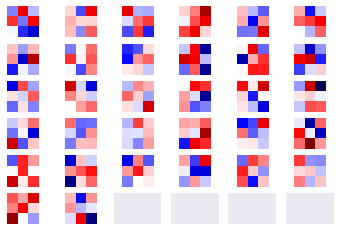

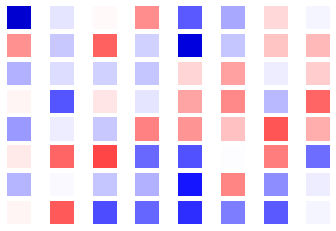

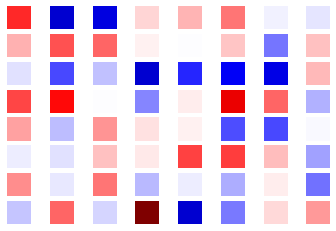

In [17]:
plot_conv_weights(weights=W1)
plot_conv_weights(weights=W2, input_channel=0)
plot_conv_weights(weights=W2, input_channel=1)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

def plot_conv_layer(layer, image):

    with tf.Session() as sess:

        sess.run(tf.global_variables_initializer())

        feed_dict = {X: [image]}
        values = sess.run(layer, feed_dict=feed_dict)

        num_filters = values.shape[3]
        num_grids = math.ceil(math.sqrt(num_filters))
        fig, axes = plt.subplots(num_grids, num_grids)

        for i, ax in enumerate(axes.flat):
            if i < num_filters:
                img = values[0, :, :, i]
                ax.imshow(img, interpolation='nearest', cmap='binary')
                
            ax.set_xticks([])
            ax.set_yticks([])

        plt.show()

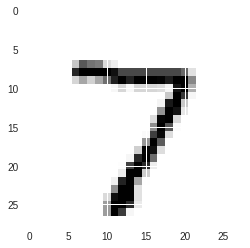

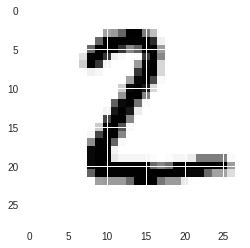

In [19]:
image1 = x_test[0]
plt.imshow(image1.reshape(28, 28))
plt.show()

image2 = x_test[1]
plt.imshow(image2.reshape(28, 28))
plt.show()

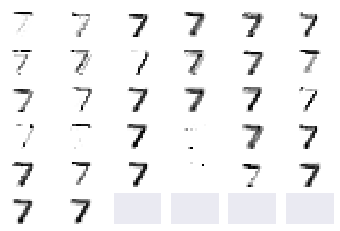

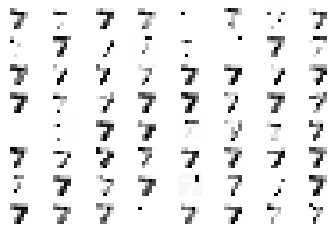

In [20]:
plot_conv_layer(layer=P1, image=image1)
plot_conv_layer(layer=P2, image=image1)